## **Desarrollo de Aplicaciones para el Análisis de Datos - Proyecto Final**

---

Espinosa Berrueco Oscar Manuel <br>
Gutiérrez Ramirez Alana Sofía

**1. Descripción general del conjunto de datos:**


---


Medical Examiner-Coroner, Fentanyl Deaths dataset


Contiene todos los registros del médico forense desde el 1 de enero de 2018 hasta el presente, relacionados con las muertes que ocurrieron en el condado de Santa Clara bajo la jurisdicción del médico forense y aquellas muertes reportables


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#CARGA DEL DATASET
import pandas as pd
from tabulate import tabulate
from textwrap import fill
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Bases de datos/Medical_Examiner-Coroner__Fentanyl_Deaths_dataset_20240612.csv')

#Tamaño del conjunto de datos
numero_filas = len(df)
numero_columnas = len(df.columns)
print(f'Número de filas: {numero_filas}')
print(f'Número de columnas: {numero_columnas}')

# OBTENER LOS TIPOS DE DATOS
tipos_de_datos = df.dtypes
print('\nTipos de datos de cada columna:')
print(tipos_de_datos)
print('\nDonde object = categórico')
print('Donde int64/float64 = numéricos\n')

print('\nValores faltantes por columna:')
print(df.isnull().sum())

Número de filas: 661
Número de columnas: 18

Tipos de datos de cada columna:
Case Number                     object
Case Status                     object
Manner of Death                 object
Age                              int64
Race                            object
Gender                          object
Death Date                      object
Death City                      object
Death Zip                      float64
Resident City                   object
Resident Zip                   float64
Incident Location               object
Incident City                   object
Incident Zip                   float64
Cause of Death                  object
Other Significant Condition     object
Latitude                       float64
Longitude                      float64
dtype: object

Donde object = categórico
Donde int64/float64 = numéricos


Valores faltantes por columna:
Case Number                      0
Case Status                      0
Manner of Death                  0
Age       

In [ ]:
#MANEJO DE DATOS FALTANTES
# Reemplazar valores N/A en la columna "Other Significant Condition" por "None"
df['Other Significant Condition'] = df['Other Significant Condition'].fillna('None')

#Eliminamos las filas de las columnas con los menores datos faltantes
f_c_eliminar = ['Incident Zip', 'Incident City', 'Gender', 'Longitude', 'Latitude', 'Death Zip', 'Death City']
df_noNull= df.dropna(subset=f_c_eliminar)
#Eliminamos la columna completa "Incident location (demasiados valores faltantes)"
df_noNull= df_noNull.drop(columns=['Incident Location'])

# Mostrar un resumen de los valores faltantes por columna después del reemplazo
print('\nResumen de valores faltantes por columna después del reemplazo:')
print(df_noNull.isnull().sum())


Resumen de valores faltantes por columna después del reemplazo:
Case Number                      0
Case Status                      0
Manner of Death                  0
Age                              0
Race                             0
Gender                           0
Death Date                       0
Death City                       0
Death Zip                        0
Resident City                  145
Resident Zip                   154
Incident City                    0
Incident Zip                     0
Cause of Death                   0
Other Significant Condition      0
Latitude                         0
Longitude                        0
dtype: int64


In [ ]:
# Crear una copia del DataFrame
df_DT = df_noNull.copy()

# Eliminar las columnas "Resident City" y "Resident Zip"
# (Tenemos las columnas latitud y longitud, entonces no las necesitamos)
df_DT = df_DT.drop(columns=['Resident City', 'Resident Zip'])

# Mostrar un resumen de los valores faltantes por columna en el nuevo DataFrame
print('\nResumen de valores faltantes por columna después de eliminar las columnas "Resident City" y "Resident Zip":')
print(df_DT.isnull().sum())


Resumen de valores faltantes por columna después de eliminar las columnas "Resident City" y "Resident Zip":
Case Number                    0
Case Status                    0
Manner of Death                0
Age                            0
Race                           0
Gender                         0
Death Date                     0
Death City                     0
Death Zip                      0
Incident City                  0
Incident Zip                   0
Cause of Death                 0
Other Significant Condition    0
Latitude                       0
Longitude                      0
dtype: int64


**2. Estadísticas Descriptivas**


---



In [ ]:
#resumen estadístico
resumen_estadistico = df_DT.describe(include='all')

# Función para formatear el texto
def format_text(title, content):
    formatted_content = fill(content, width=80)
    return f"\n{title}\n{'=' * len(title)}\n{formatted_content}\n"

# Crear el análisis en formato legible
analysis = []

# Número de casos
total_casos = len(df_DT)
analysis.append(format_text("Número de casos", f"{total_casos}"))

# Estados del caso
caso_counts = df_DT['Case Status'].value_counts().to_dict()
analysis.append(format_text("Estados del caso", str(caso_counts)))

# Maneras de muerte
death_counts = df_DT['Manner of Death'].value_counts().to_dict()
analysis.append(format_text("Maneras de muerte", str(death_counts)))

# Estadísticas demográficas
edad_stad = resumen_estadistico['Age'][['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']].to_dict()
analysis.append(format_text("Edad", str(edad_stad)))

# Raza y Género
raza_counts = df_DT['Race'].value_counts().to_dict()
genero_counts = df_DT['Gender'].value_counts().to_dict()
analysis.append(format_text("Raza", str(raza_counts)))
analysis.append(format_text("Género", str(genero_counts)))

# Localización de la muerte
deathc_count = df_DT['Death City'].value_counts().to_dict()
deathz_stad = resumen_estadistico['Death Zip'][['count','min', '25%', '50%', '75%', 'max']].to_dict()
analysis.append(format_text("Ciudades de muerte", str(deathc_count)))
analysis.append(format_text("Códigos postales de muerte", str(deathz_stad)))

# Causas y condiciones de muerte
specific_causes = {
    "Fentanyl and 4-ANPP toxicity": df_DT['Cause of Death'].str.contains("Fentanyl and 4-ANPP toxicity").sum(),
    "Combined fentanyl and cocaine toxicity": df_DT['Cause of Death'].str.contains("Combined fentanyl and cocaine toxicity").sum()
}
specific_conditions = {
    "None": df_DT['Other Significant Condition'].str.contains("None").sum(),
    "Various medical conditions": df_DT['Other Significant Condition'].dropna().size - df_DT['Other Significant Condition'].str.contains("None").sum()
}
analysis.append(format_text("Causas de muerte", str(specific_causes)))
analysis.append(format_text("Condiciones significativas adicionales", str(specific_conditions)))


# Localización del incidente
incidentc_count = df_DT['Incident City'].value_counts().to_dict()
incidentz_stad = resumen_estadistico['Incident Zip'][['count','min', '25%', '50%', '75%', 'max']].to_dict()
analysis.append(format_text("Ciudades de incidente", str(incidentc_count)))
analysis.append(format_text("Códigos postales de incidente", str(incidentz_stad)))

# Coordenadas geográficas
latitud_stad = resumen_estadistico['Latitude'][['count','min', '25%', '50%', '75%', 'max']].to_dict()
longitud_stad = resumen_estadistico['Longitude'][['count','min', '25%', '50%', '75%', 'max']].to_dict()
analysis.append(format_text("Latitud", str(latitud_stad)))
analysis.append(format_text("Longitud", str(longitud_stad)))

# Mostrar el análisis
for section in analysis:
    print(section)


Número de casos
644


Estados del caso
{'Closed': 579, 'Open': 65}


Maneras de muerte
{'Accident': 610, 'Undetermined': 22, 'Suicide': 8, 'Homicide': 2, 'Natural': 1,
'Pending': 1}


Edad
====
{'count': 644.0, 'mean': 37.25155279503105, 'std': 14.187877793338274, 'min':
0.0, '25%': 26.0, '50%': 35.0, '75%': 47.0, 'max': 85.0}


Raza
====
{'White': 287, 'Hispanic/Latino': 223, 'BlackAfricanAmerican': 51, 'Asian': 43,
'Other': 26, 'OtherPacificIslander': 5, 'American Indian': 4, 'American Indian /
Alaskan Native': 3, 'Hispanic/Latino; White': 1, 'Unknown': 1}


Género
{'Male': 522, 'Female': 122}


Ciudades de muerte
{'San Jose': 447, 'Santa Clara': 38, 'Gilroy': 35, 'Sunnyvale': 26, 'Mountain
View': 21, 'Milpitas': 17, 'Stanford': 11, 'Palo Alto': 11, 'Campbell': 10, 'Los
Gatos': 9, 'Morgan Hill': 7, 'Cupertino': 4, 'Los Altos': 4, 'Saratoga': 3, 'San
Martin': 1}


Códigos postales de muerte
{'count': 644.0, 'min': 94022.0, '25%': 95050.0, '50%': 95116.0, '75%': 95125.0,
'max': 95148.

**3 y 4. Visualización de datos y Analisis de correlación:**


---



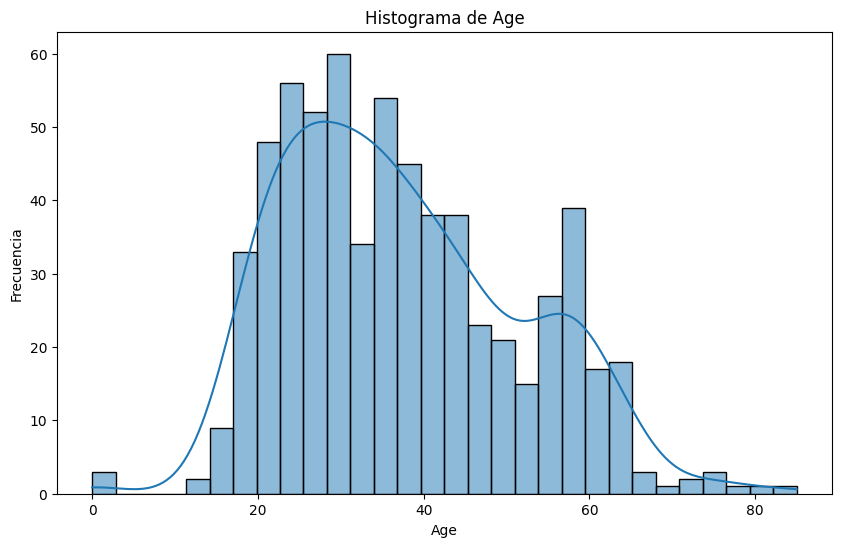

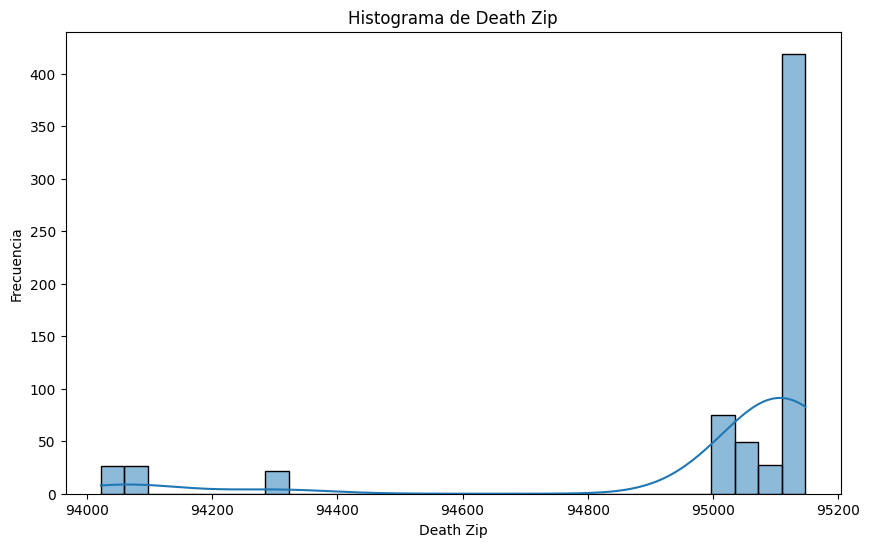

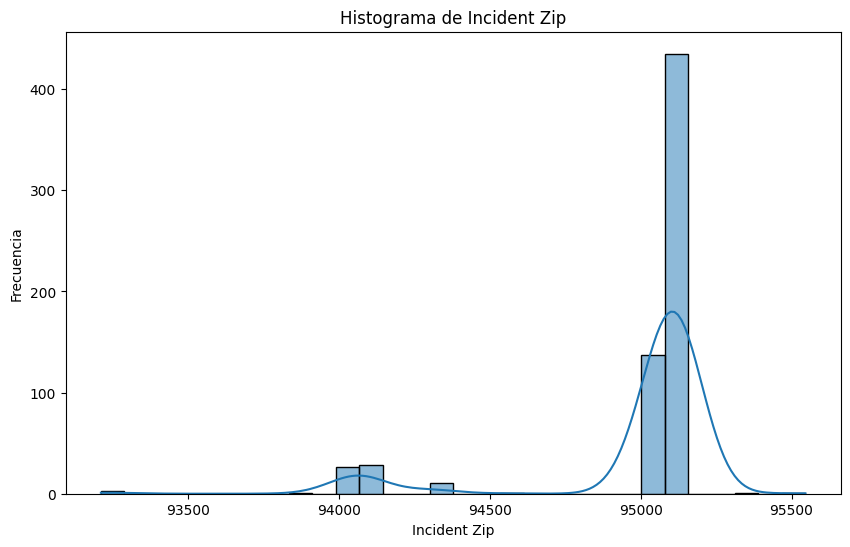

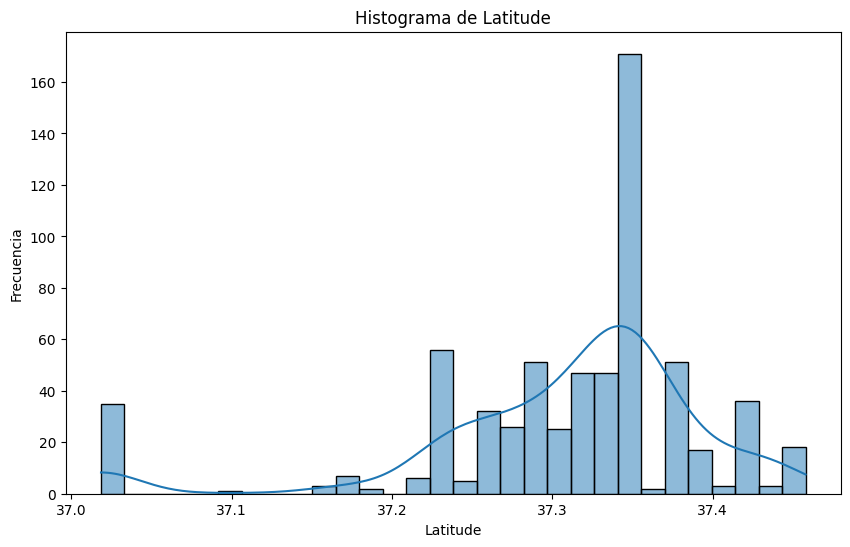

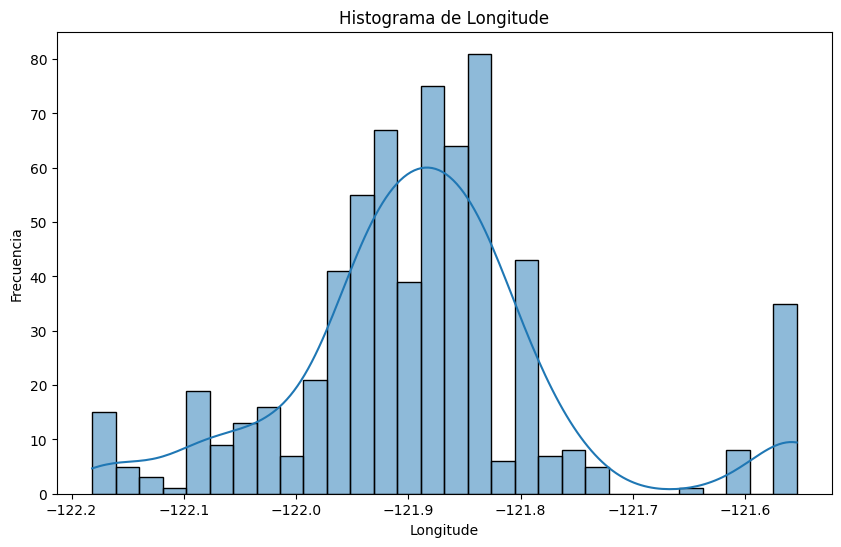

In [ ]:
# Convertir 'Death Date' a datetime
# df_DT['Death Date'] = pd.to_datetime(df_DT['Death Date'])

# Histograma para variables numéricas
num_columns = ['Age', 'Death Zip', 'Incident Zip', 'Latitude', 'Longitude']
for column in num_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_DT[column], kde=True, bins=30)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

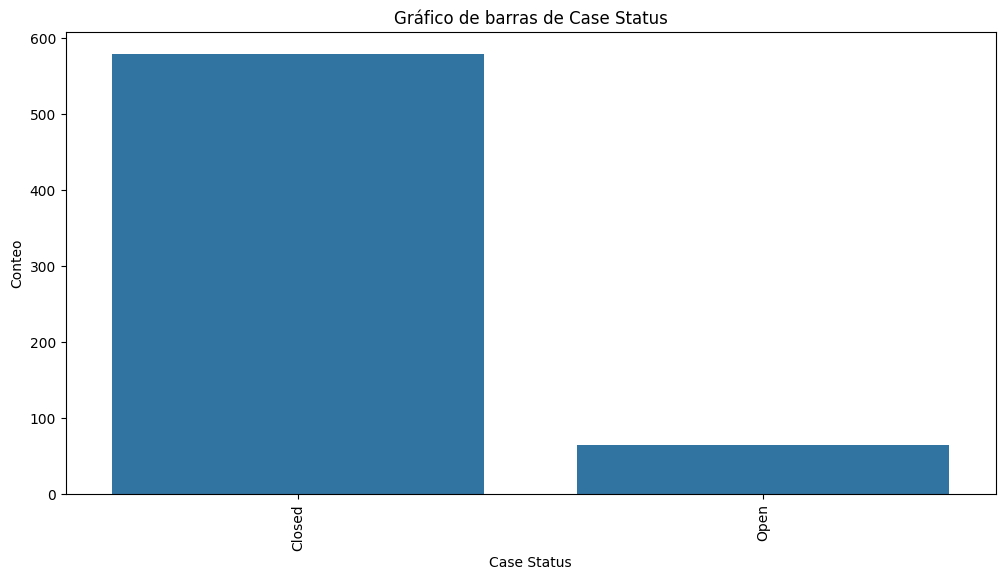

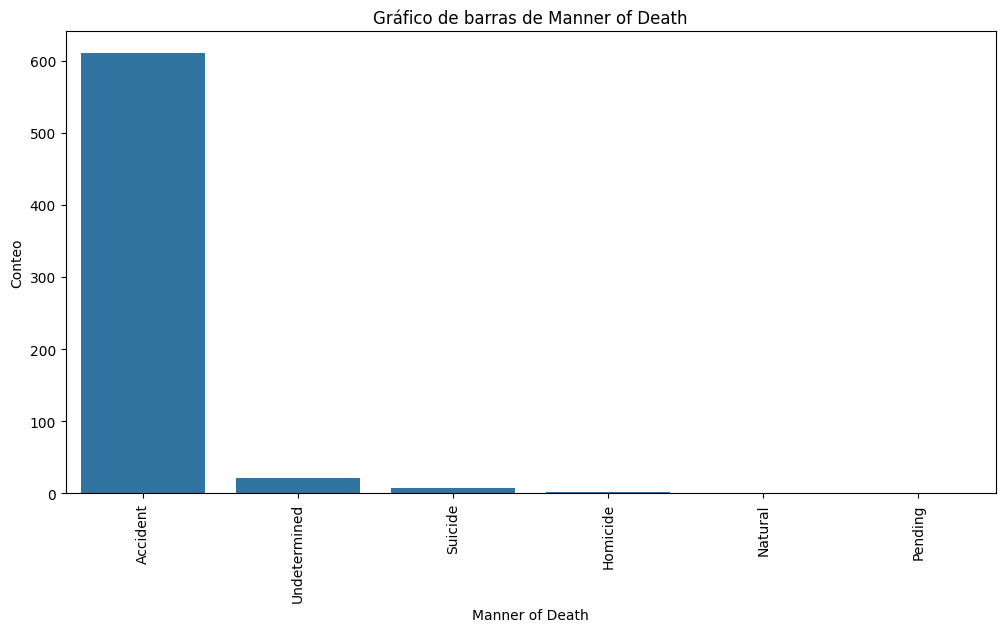

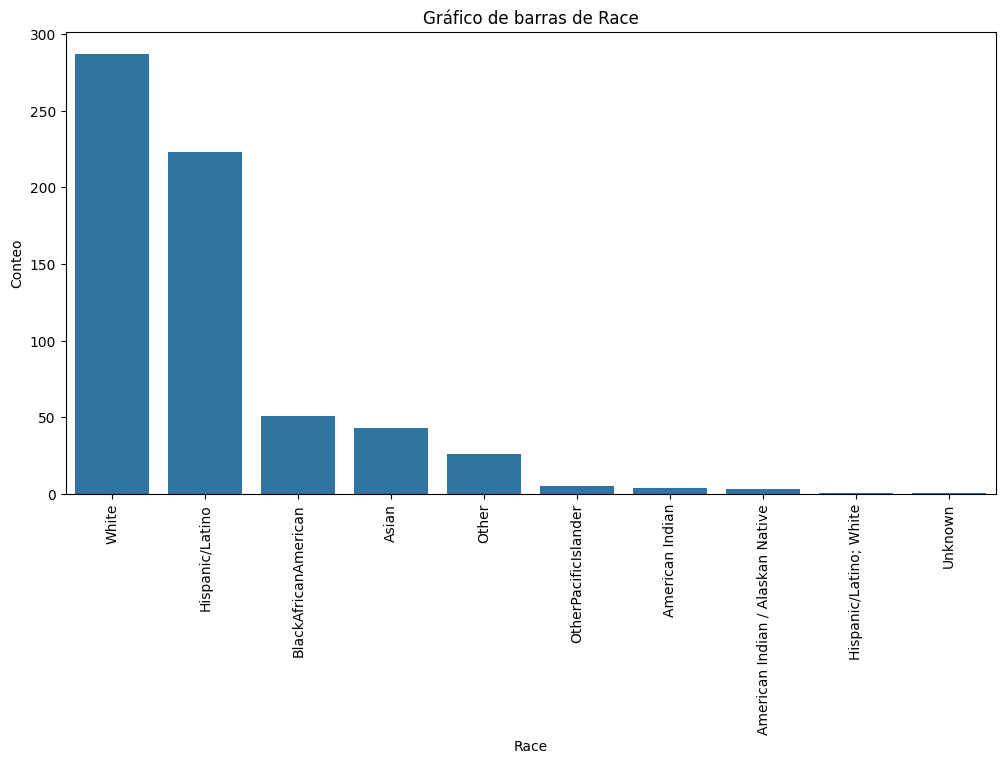

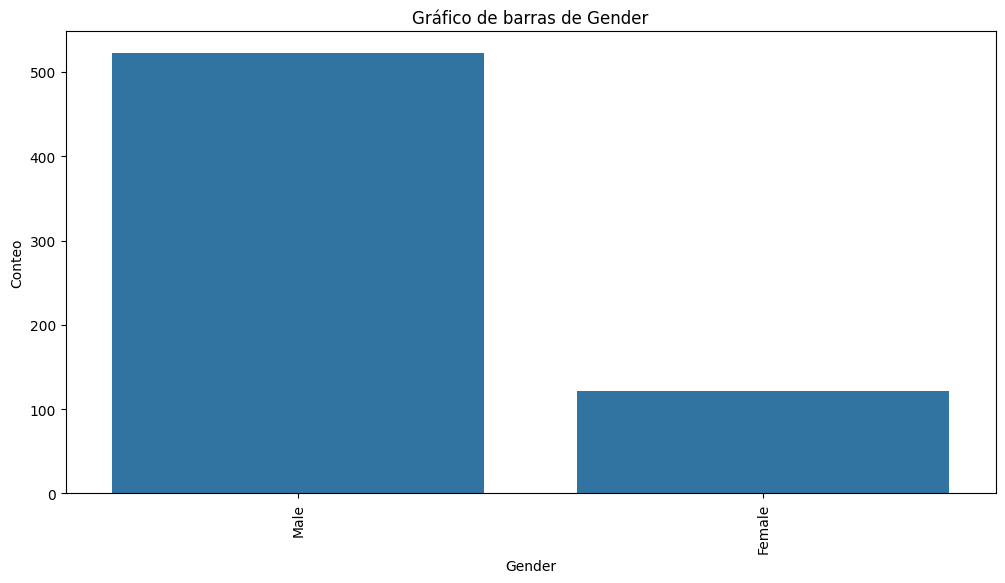

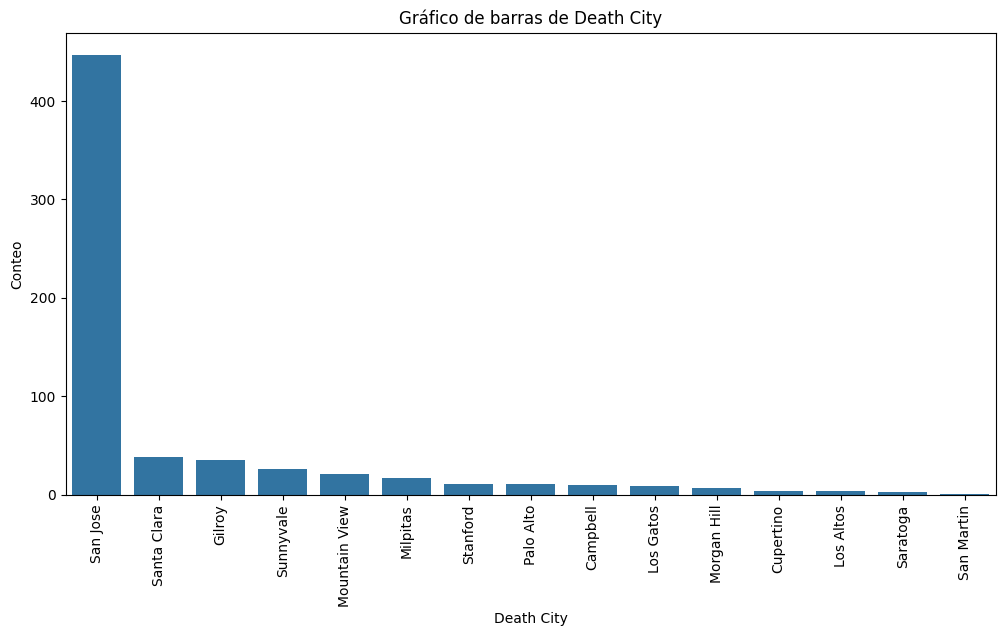

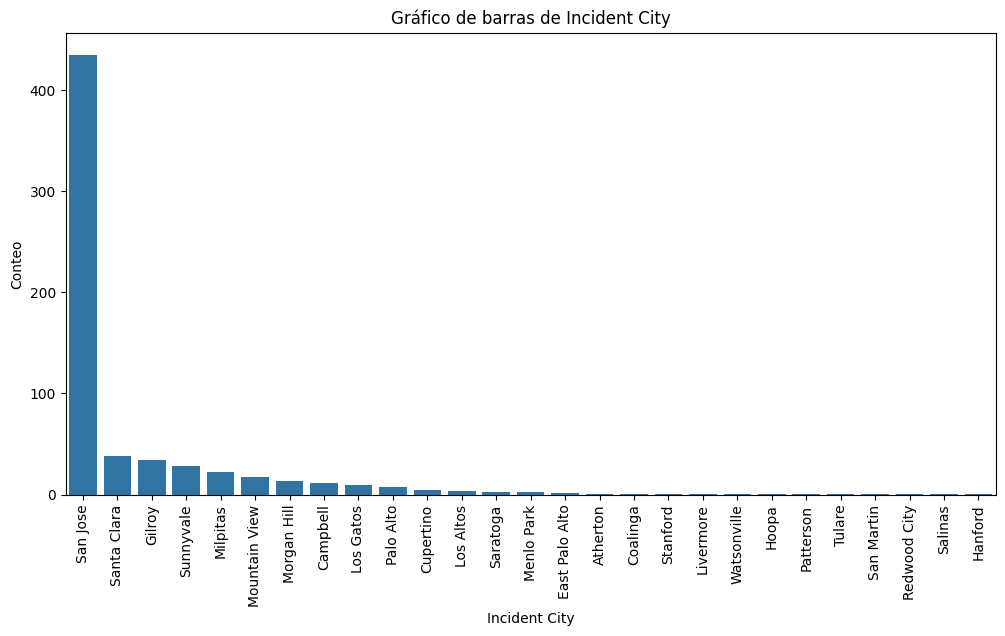

In [ ]:
# Gráficos de barras para variables categóricas
categoricas_column = ['Case Status', 'Manner of Death', 'Race', 'Gender', 'Death City', 'Incident City']
for column in categoricas_column:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_DT, x=column, order=df_DT[column].value_counts().index)
    plt.title(f'Gráfico de barras de {column}')
    plt.xlabel(column)
    plt.ylabel('Conteo')
    plt.xticks(rotation=90)
    plt.show()

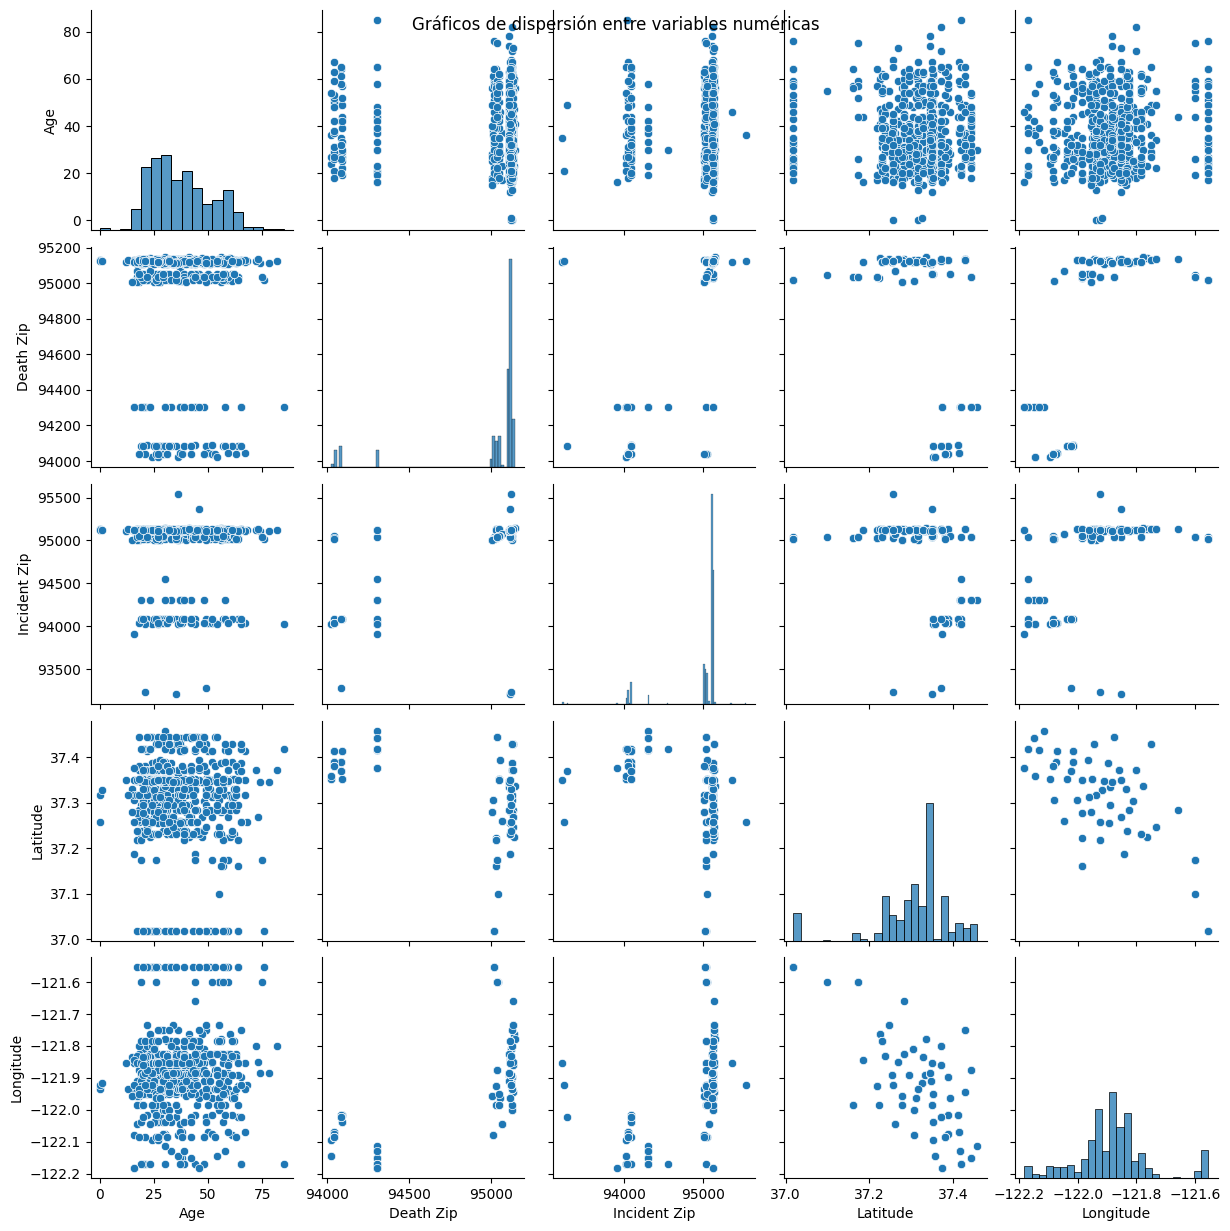

In [ ]:
# Gráficos de dispersión para explorar relaciones entre variables
pairplot_columns = ['Age', 'Death Zip', 'Incident Zip', 'Latitude', 'Longitude']
sns.pairplot(df_DT[pairplot_columns])
plt.suptitle('Gráficos de dispersión entre variables numéricas')
plt.show()

   Gender        Age
0  Female  35.008197
1    Male  37.775862


<ipython-input-23-7561c9739601>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=edad_promedio_por_genero, x='Gender', y='Age', palette='coolwarm')


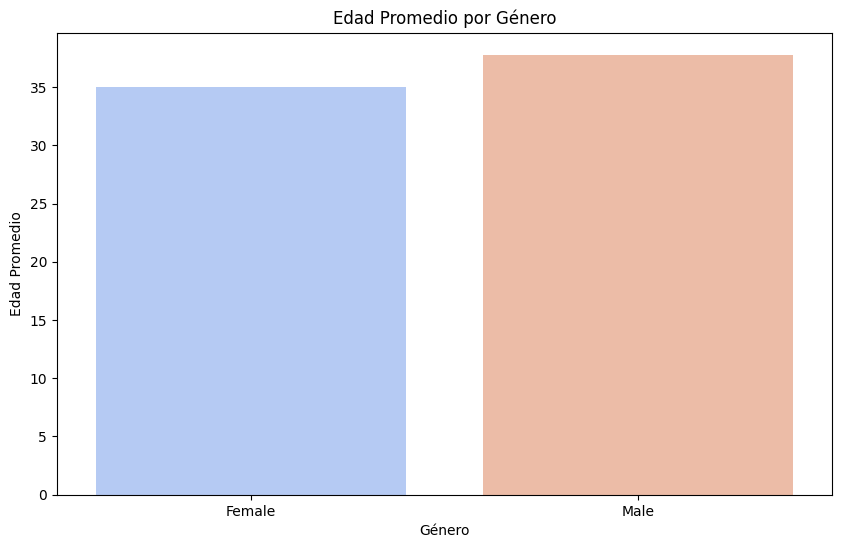

In [ ]:
# Calcular la edad promedio por género
edad_promedio_por_genero = df_DT.groupby('Gender')['Age'].mean().reset_index()

# Verificar el dataframe resultante
print(edad_promedio_por_genero)

# Crear un gráfico de barras para la edad promedio por género
plt.figure(figsize=(10, 6))
sns.barplot(data=edad_promedio_por_genero, x='Gender', y='Age', palette='coolwarm')

# Etiquetas y título
plt.title('Edad Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Edad Promedio')

# Mostrar el gráfico
plt.show()


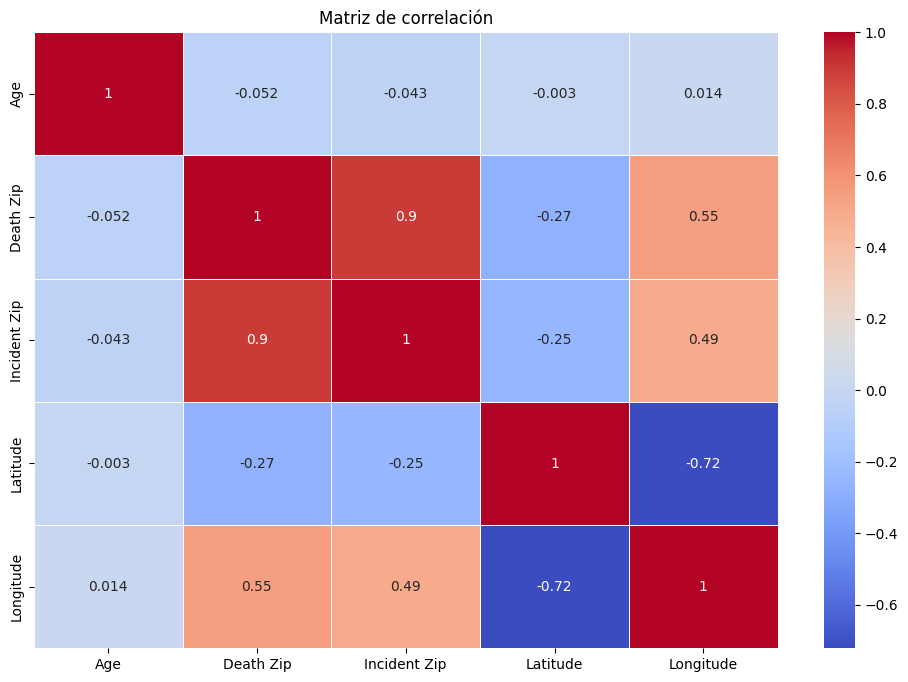

In [ ]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
matriz_corr = df_DT[num_columns].corr()
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

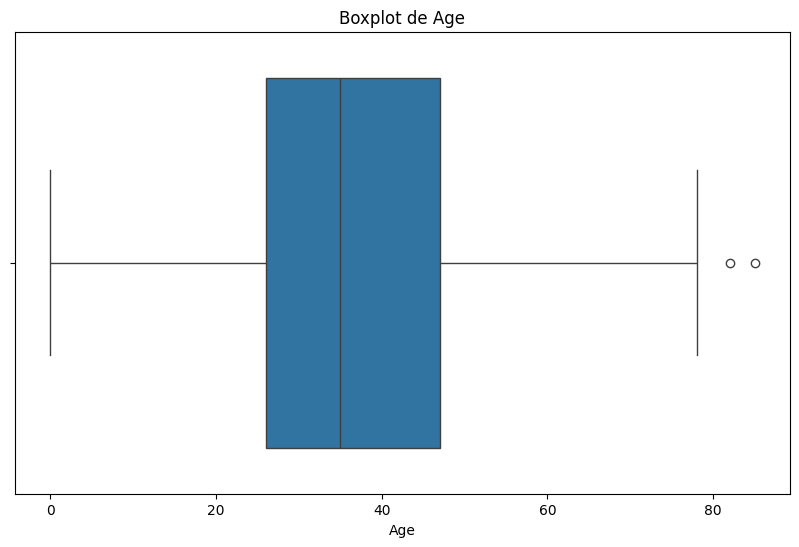

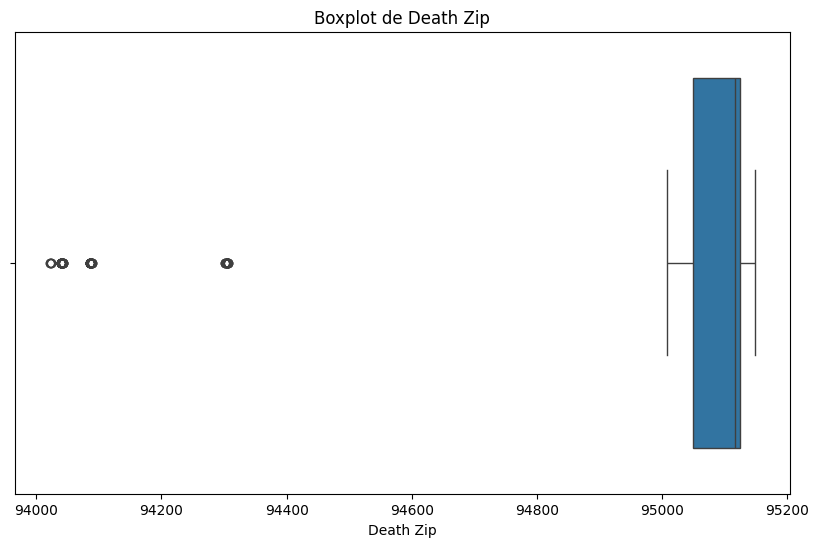

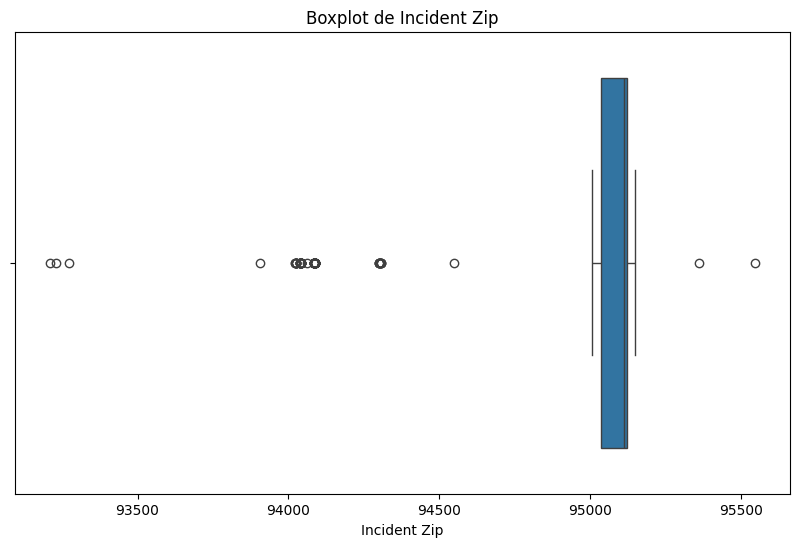

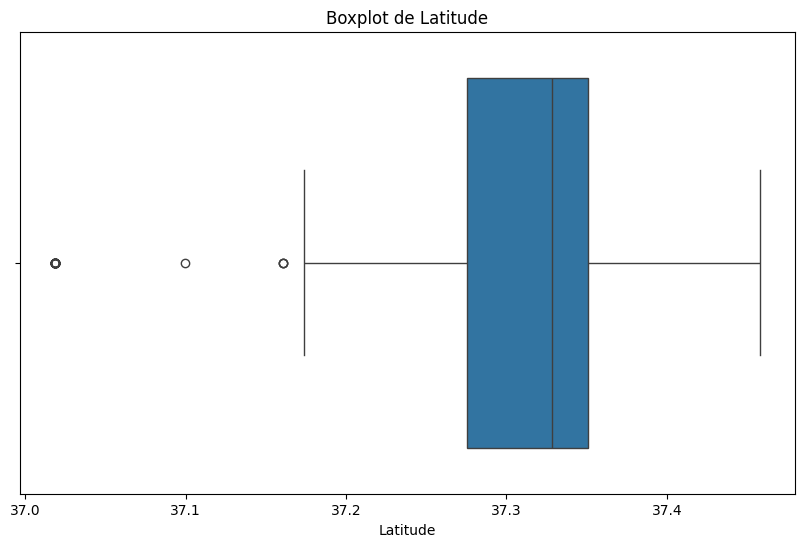

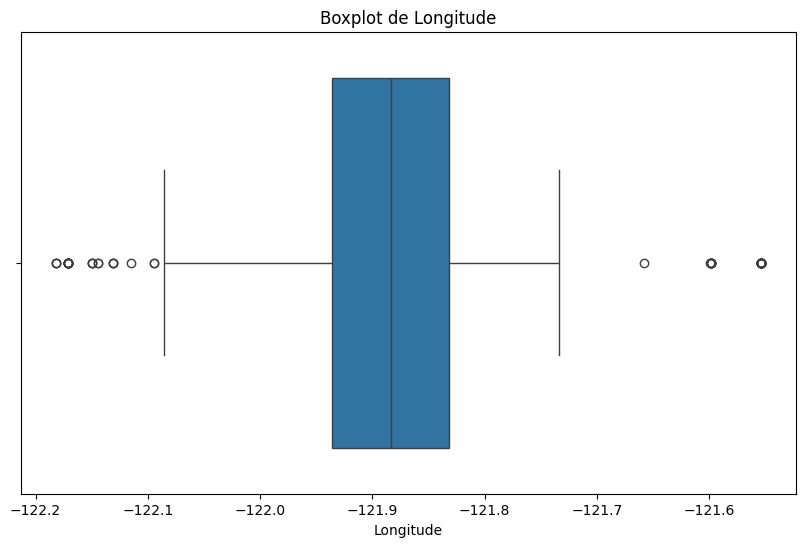

In [ ]:
# Boxplots para detectar valores atípicos
for column in num_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_DT[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()

**5. Exploración de relaciones:**

---


In [ ]:
!pip install geopandas contextily


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 18.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-31-64226895e288>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster'] = kmeans.fit_predict(df_filtered[['Longitude', 'Latitude']])


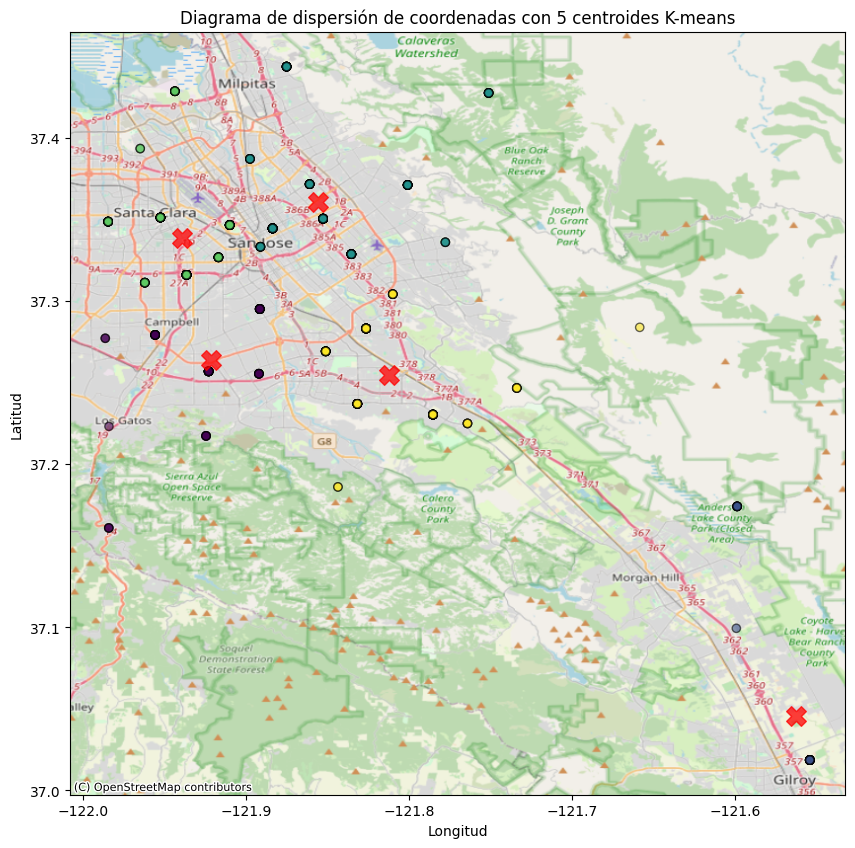

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx
from sklearn.cluster import KMeans

# Filtrar las coordenadas para el condado de Santa Clara (aproximadamente)
lat_min, lat_max = 36.9, 37.6
lon_min, lon_max = -122.0, -121.2

df_filtered = df_DT[(df_DT['Latitude'] >= lat_min) & (df_DT['Latitude'] <= lat_max) &
                    (df_DT['Longitude'] >= lon_min) & (df_DT['Longitude'] <= lon_max)]

def plot_kmeans(df_filtered, n_clusters):
    # Aplicar K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df_filtered['Cluster'] = kmeans.fit_predict(df_filtered[['Longitude', 'Latitude']])

    # Crear el diagrama de dispersión
    fig, ax = plt.subplots(figsize=(10, 10))
    scatter = ax.scatter(df_filtered['Longitude'], df_filtered['Latitude'], c=df_filtered['Cluster'], cmap='viridis', alpha=0.6, edgecolor='k')

    # Agregar los centroides al gráfico
    centroids = kmeans.cluster_centers_
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')

    # Agregar el mapa de fondo
    ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

    # Configurar etiquetas y título
    ax.set_title(f'Diagrama de dispersión de coordenadas con {n_clusters} centroides K-means')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')

    # Mostrar el gráfico
    plt.show()

# Definir la cantidad de centroides deseada
n_clusters = 5  # Cambia este valor según lo necesites

plot_kmeans(df_filtered, n_clusters)


**6. Manejo de valores atípicos:**

---

In [ ]:
"""

En nuestro análisis de datos sobre muertes por fentanilo, hemos identificado valores que podrían considerarse atípicos. Sin embargo hemos determinado que estos valores no son el resultado de errores en la toma de datos.

Los valores atípicos pueden proporcionar información crucial sobre casos extremos o excepcionales. Mantener estos valores en el análisis garantiza una representación completa de los datos.

Por estas razones, hemos decidido incluir los valores atípicos en nuestro análisis asegurando así una evaluación más detallada.

"""

**7. Análisis de distribuciones y normalidad:**

---

**8. Aplicación algoritmo del reconocimiento de patrones:**

---

In [ ]:
# Convertir 'Death Date' a datetime
df_DT['Death Date'] = pd.to_datetime(df_DT['Death Date'])

# Extraer el año y el mes de la fecha de muerte
df_DT['Year-Month'] = df_DT['Death Date'].dt.to_period('M')

# Agrupar por 'Year-Month' y contar el número de muertes
muertes_por_mes = df_DT.groupby('Year-Month').size().reset_index(name='Número de Muertes')

# Convertir 'Year-Month' a una columna de tipo datetime para facilitar la visualización
muertes_por_mes['Year-Month'] = muertes_por_mes['Year-Month'].dt.to_timestamp()

# Verificar el dataframe resultante
print(muertes_por_mes.head())


  Year-Month  Número de Muertes
0 2018-05-01                  3
1 2018-06-01                  1
2 2018-07-01                  2
3 2018-08-01                  1
4 2018-09-01                  1


<ipython-input-22-c8073b085e96>:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


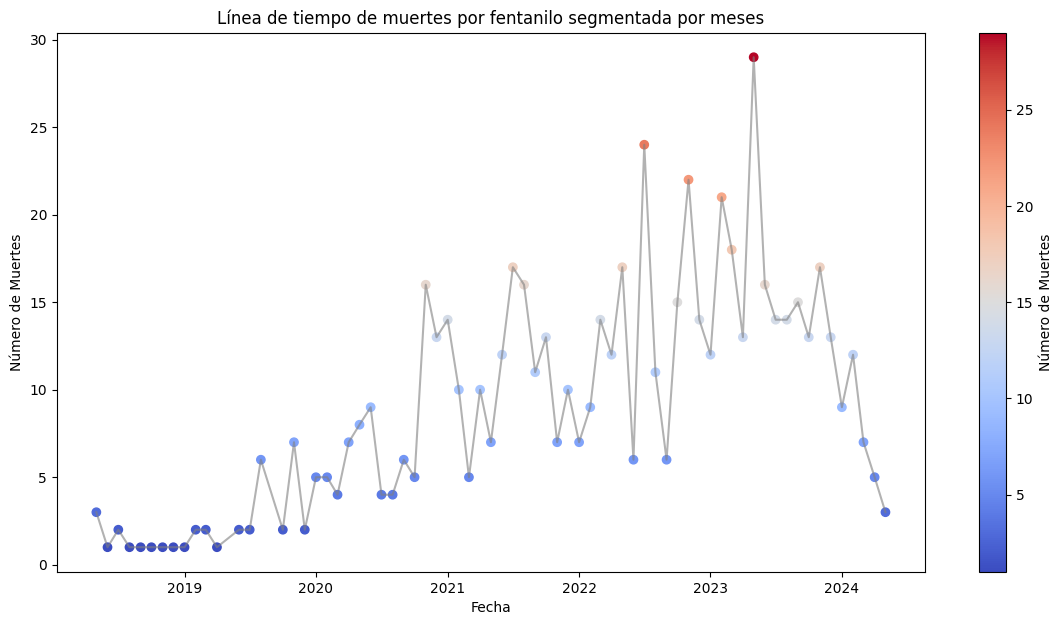

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la gráfica de línea de tiempo
plt.figure(figsize=(14, 7))
norm = plt.Normalize(muertes_por_mes['Número de Muertes'].min(), muertes_por_mes['Número de Muertes'].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])

# Gráfica de línea con colores
points = plt.scatter(muertes_por_mes['Year-Month'], muertes_por_mes['Número de Muertes'], c=muertes_por_mes['Número de Muertes'], cmap="coolwarm", norm=norm)
plt.plot(muertes_por_mes['Year-Month'], muertes_por_mes['Número de Muertes'], color='grey', alpha=0.6)

# Configurar etiquetas y título
plt.title('Línea de tiempo de muertes por fentanilo segmentada por meses')
plt.xlabel('Fecha')
plt.ylabel('Número de Muertes')

# Agregar la barra de color
cbar = plt.colorbar(sm)
cbar.set_label('Número de Muertes')

# Mostrar el gráfico
plt.show()


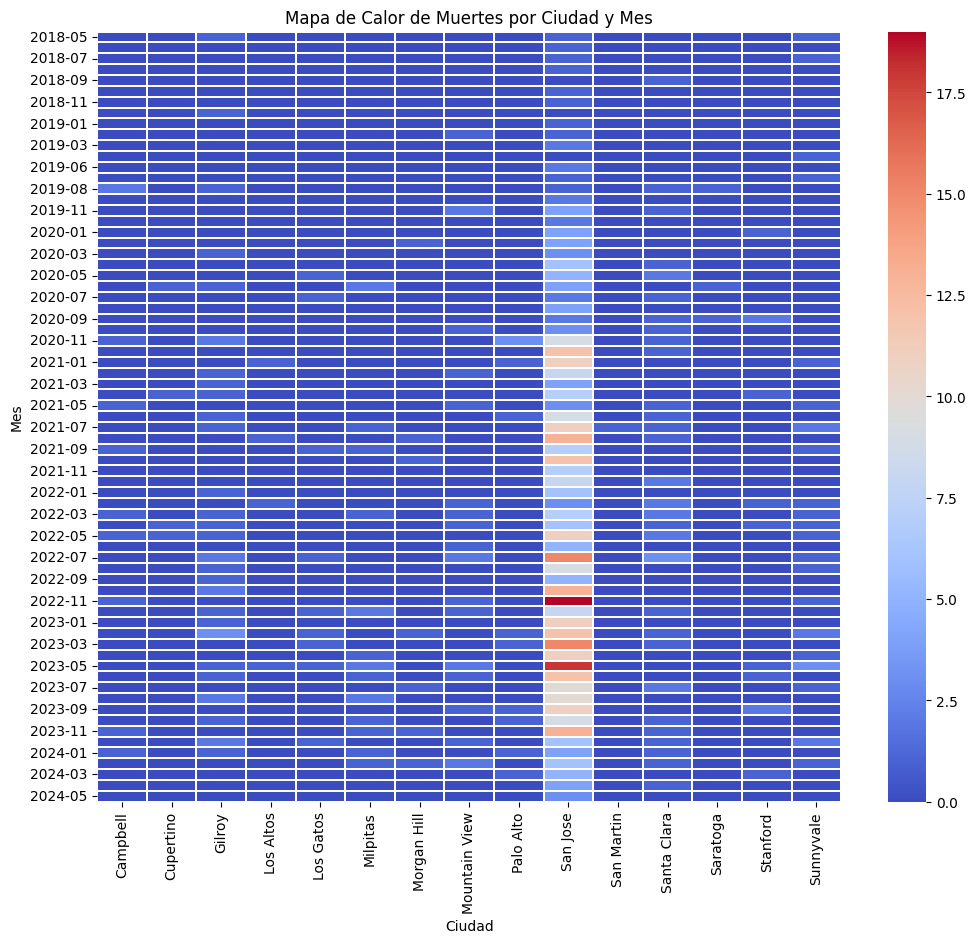

In [ ]:
# Contar el número de muertes por ciudad y mes
muertes_por_ciudad_mes = df_DT.groupby([df_DT['Death Date'].dt.to_period('M'), 'Death City']).size().unstack(fill_value=0)

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(muertes_por_ciudad_mes, cmap="coolwarm", linecolor='white', linewidths=0.1)

# Configurar etiquetas y título
plt.title('Mapa de Calor de Muertes por Ciudad y Mes')
plt.xlabel('Ciudad')
plt.ylabel('Mes')

plt.show()


<ipython-input-25-68b40a809ae4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_DT, x='Manner of Death', y='Age', palette='coolwarm')


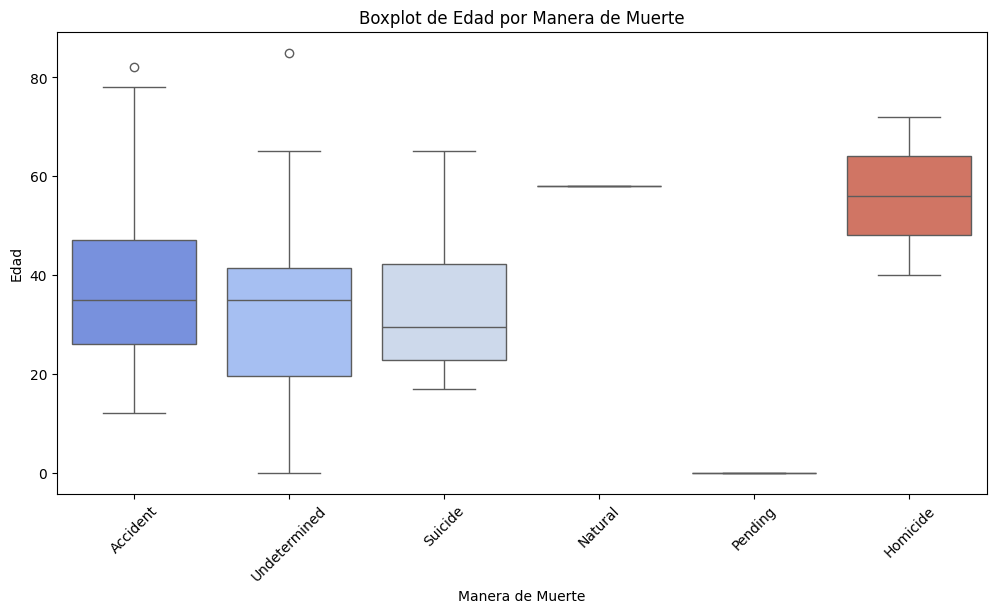

In [ ]:
# Crear un boxplot de la edad por manera de muerte
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_DT, x='Manner of Death', y='Age', palette='coolwarm')

# Configurar etiquetas y título
plt.title('Boxplot de Edad por Manera de Muerte')
plt.xlabel('Manera de Muerte')
plt.ylabel('Edad')

plt.xticks(rotation=45)
plt.show()


<ipython-input-30-32cd13d2451f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condiciones_df.index, y=condiciones_df.values, palette='coolwarm')


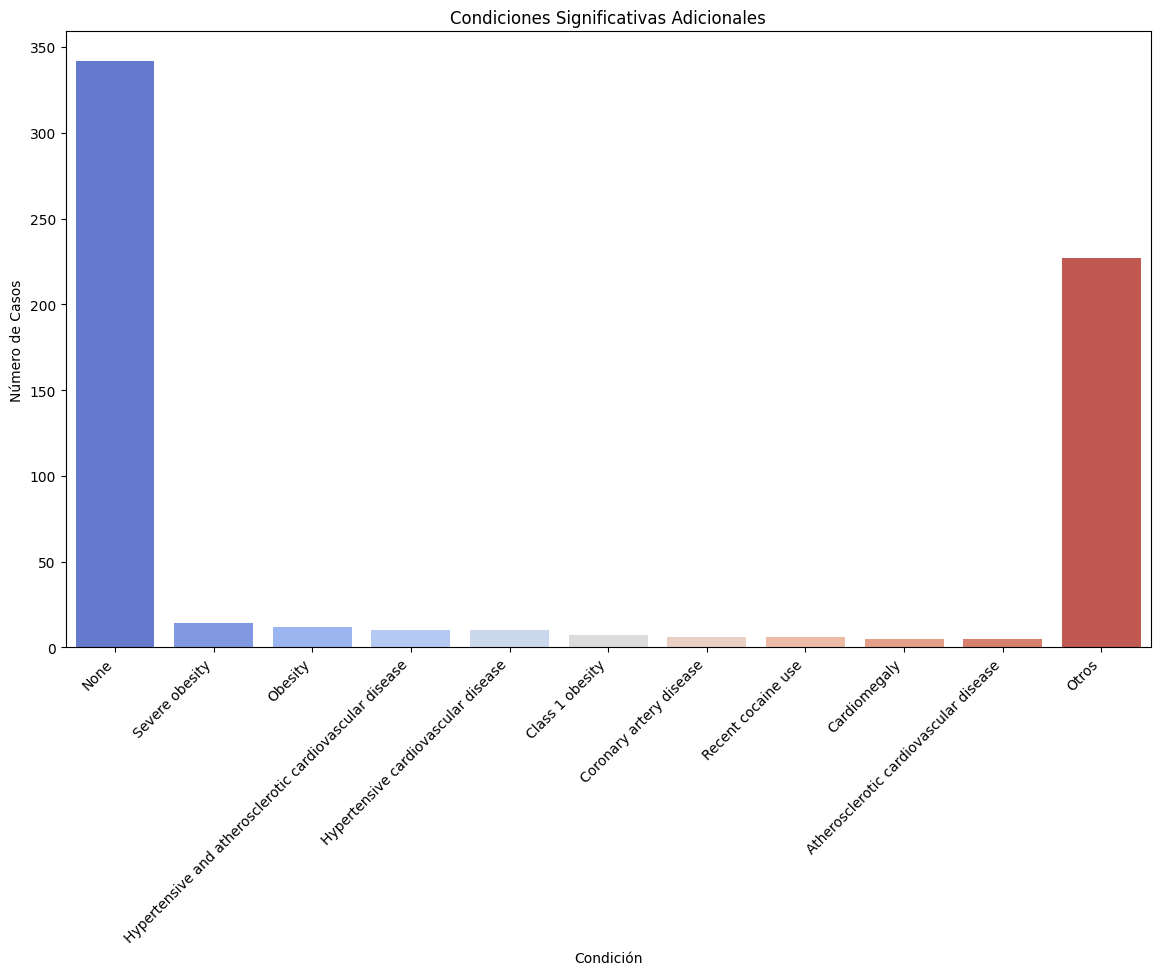

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contar las condiciones significativas adicionales
condiciones_significativas = df_DT['Other Significant Condition'].value_counts()

# Filtrar para mostrar solo las 10 condiciones más comunes y agrupar las demás en 'Otros'
top_condiciones = condiciones_significativas.head(10)
otros = pd.Series(condiciones_significativas[10:].sum(), index=['Otros'])

# Crear un nuevo DataFrame para las condiciones usando pd.concat
condiciones_df = pd.concat([top_condiciones, otros])

# Crear un gráfico de barras mejorado
plt.figure(figsize=(14, 8))
sns.barplot(x=condiciones_df.index, y=condiciones_df.values, palette='coolwarm')

# Configurar etiquetas y título
plt.title('Condiciones Significativas Adicionales')
plt.xlabel('Condición')
plt.ylabel('Número de Casos')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
#-----Intento de método predictivo----

import pandas as pd
import matplotlib.pyplot as plt

# Convertir 'Death Date' a datetime si no está ya convertido
df_DT['Death Date'] = pd.to_datetime(df_DT['Death Date'])

# Contar el número de muertes por mes
muertes_por_mes = df_DT['Death Date'].dt.to_period('M').value_counts().sort_index()
muertes_por_mes = muertes_por_mes.to_timestamp()

# Convertir a DataFrame
muertes_por_mes = muertes_por_mes.reset_index()
muertes_por_mes.columns = ['Month', 'Number of Deaths']
muertes_por_mes.set_index('Month', inplace=True)

# Mostrar los datos
print(muertes_por_mes.head())


            Number of Deaths
Month                       
2018-05-01                 3
2018-06-01                 1
2018-07-01                 2
2018-08-01                 1
2018-09-01                 1


In [ ]:
# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_size = int(len(muertes_por_mes) * 0.8)
train, test = muertes_por_mes[:train_size], muertes_por_mes[train_size:]

# Mostrar los tamaños de los conjuntos
print(f'Tamaño del conjunto de entrenamiento: {len(train)}')
print(f'Tamaño del conjunto de prueba: {len(test)}')


Tamaño del conjunto de entrenamiento: 56
Tamaño del conjunto de prueba: 15


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA
model = ARIMA(train, order=(5, 1, 0))  # (p, d, q) puede ajustarse según sea necesario
model_fit = model.fit()

# Resumen del modelo
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       Number of Deaths   No. Observations:                   56
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -156.793
Date:                Mon, 01 Jul 2024   AIC                            325.586
Time:                        06:55:30   BIC                            337.630
Sample:                             0   HQIC                           330.243
                                 - 56                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7180      0.156     -4.612      0.000      -1.023      -0.413
ar.L2         -0.4945      0.184     -2.694      0.007      -0.854      -0.135
ar.L3         -0.2951      0.178     -1.659      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


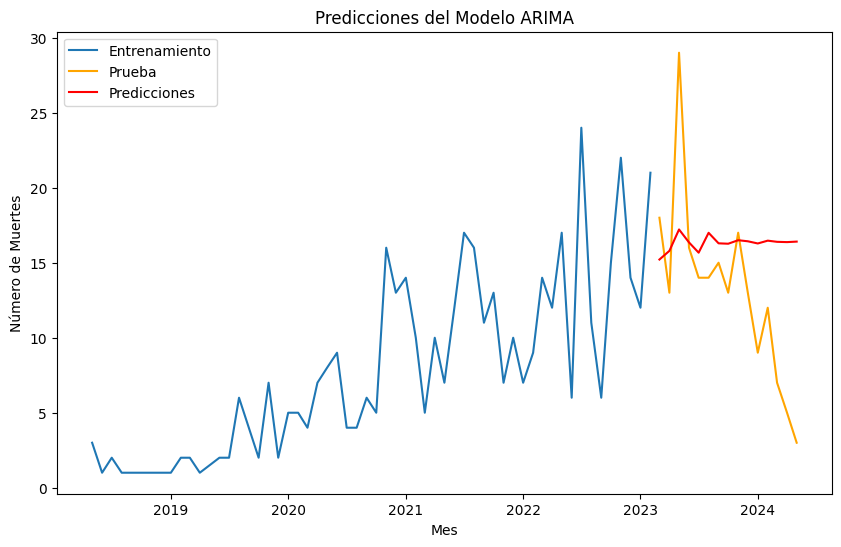

Error Cuadrático Medio (MSE): 44.0695963834993


In [ ]:
# Hacer predicciones
predictions = model_fit.forecast(steps=len(test))

# Comparar las predicciones con los valores reales
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Prueba', color='orange')
plt.plot(test.index, predictions, label='Predicciones', color='red')
plt.xlabel('Mes')
plt.ylabel('Número de Muertes')
plt.title('Predicciones del Modelo ARIMA')
plt.legend()
plt.show()




**9. Métricas de desempeño:**

---


In [ ]:
# Evaluar el desempeño del modelo
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, predictions)
print(f'Error Cuadrático Medio (MSE): {mse}')

Error Cuadrático Medio (MSE): 44.0695963834993


https://www.dallasnews.com/espanol/al-dia/salud/2023/03/29/narcan-venta-libre-sobredosis-fentanilo-fda/